In [2]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [4]:
random_runs = [
    "kobybibas/pnml_for_active_learning/2wveodh5",
    "kobybibas/pnml_for_active_learning/2zdwt6p9",
    "kobybibas/pnml_for_active_learning/1kxnmmfk",
    "kobybibas/pnml_for_active_learning/1pde24jz",
    "kobybibas/pnml_for_active_learning/3d8zztpy",
    "kobybibas/pnml_for_active_learning/27evmn5h",
]
bald_runs = [
    "kobybibas/pnml_for_active_learning/18alsmy8",
    "kobybibas/pnml_for_active_learning/2wi09eg2",
    "kobybibas/pnml_for_active_learning/qdpvcdiq",
    "kobybibas/pnml_for_active_learning/2255euwa",
    "kobybibas/pnml_for_active_learning/3oxmtm94",
    "kobybibas/pnml_for_active_learning/2hwyn859",
]

kmean_runs = [
    'kobybibas/pnml_for_active_learning/3q2gcjf6',
    'kobybibas/pnml_for_active_learning/1wjd4fos',
    'kobybibas/pnml_for_active_learning/1w5709p2',
    'kobybibas/pnml_for_active_learning/1wuq6elv',
    'kobybibas/pnml_for_active_learning/10y0grxx',
    'kobybibas/pnml_for_active_learning/3t72irke'
]

pnml_runs = [
    'kobybibas/pnml_for_active_learning/f8vdemyk',
    'kobybibas/pnml_for_active_learning/293fo40c',
    'kobybibas/pnml_for_active_learning/2yk11gfw',
    'kobybibas/pnml_for_active_learning/2jacpjdx',
    'kobybibas/pnml_for_active_learning/10b91z3f',
    'kobybibas/pnml_for_active_learning/2nzpapfg'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
kmean_dfs = process_results(api=api,run_list=kmean_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2wveodh5
kobybibas/pnml_for_active_learning/2zdwt6p9
kobybibas/pnml_for_active_learning/1kxnmmfk
kobybibas/pnml_for_active_learning/1pde24jz
kobybibas/pnml_for_active_learning/3d8zztpy
kobybibas/pnml_for_active_learning/27evmn5h
kobybibas/pnml_for_active_learning/18alsmy8
kobybibas/pnml_for_active_learning/2wi09eg2
kobybibas/pnml_for_active_learning/qdpvcdiq
kobybibas/pnml_for_active_learning/2255euwa
kobybibas/pnml_for_active_learning/3oxmtm94
kobybibas/pnml_for_active_learning/2hwyn859
kobybibas/pnml_for_active_learning/3q2gcjf6
kobybibas/pnml_for_active_learning/1wjd4fos
kobybibas/pnml_for_active_learning/1w5709p2
kobybibas/pnml_for_active_learning/1wuq6elv
kobybibas/pnml_for_active_learning/10y0grxx
kobybibas/pnml_for_active_learning/3t72irke
kobybibas/pnml_for_active_learning/f8vdemyk
kobybibas/pnml_for_active_learning/293fo40c
kobybibas/pnml_for_active_learning/2yk11gfw
kobybibas/pnml_for_active_learning/2jacpjdx
kobybibas/pnml_for_active_learni

In [5]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
kmean_res = execute_df_rollout(kmean_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)
plot_list = [(random_res, "Random"), (bald_res, "Bald"), (kmean_res, 'Core-set'),(pnml_res, "DIAL")]


In [6]:
row = find_max_train_save(pnml_res, bald_res)
print(100 * row.training_set_size_left / row.training_set_size_right)
print(row)

80.86124401913875
training_set_size_left     169.000000
test_acc_left                0.955773
test_acc_round               0.956000
training_set_size_right    209.000000
test_acc_right               0.956207
Name: 210, dtype: float64


MNIST


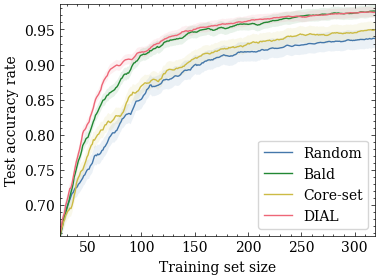

In [7]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(plot_list,fig,ax)
print("MNIST")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist.pdf"))
plt.show()

# OOD Ratio

In [8]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs, rolling_size=rolling_size,metric="label_-1_ratio")
bald_res = execute_df_rollout(bald_dfs, rolling_size=rolling_size,metric="label_-1_ratio")
pnml_res = execute_df_rollout(pnml_dfs, rolling_size=rolling_size,metric="label_-1_ratio")
kmean_res = execute_df_rollout(kmean_dfs, rolling_size=rolling_size,metric="label_-1_ratio")
plot_list = [
    (random_res, "Random"),
    (bald_res, "Bald"),
    (kmean_res, "Core-set"),
    (pnml_res, "DIAL"),
]

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4 , 3 ))
fig, ax = execute_plot(plot_list, fig, ax)
ax.set_xlim(right=5000)
ax.set_ylabel('OOD to training ratio')
ax.get_legend().remove()
print("MNIST OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist_ood_ratio.pdf"))
plt.show()

KeyError: 'Column not found: label_-1_ratio'